### SKBL - JSON data occupation

* GITHUB [salgo60/HISCOKoder](https://github.com/salgo60/HISCOKoder)
  * this [Notebook](https://github.com/salgo60/HISCOKoder/blob/main/Jupyter/SKBL%20yrken%20JSON.ipynb)

SKBL är en av de få svenska aktörer som har strukturerad data för yrken och ett API. Dock saknas externa kopplingar som Wikidata och HISCOkoder.... även tid anges som textsträngar i olika format, plats saknar även det "samma som" utan blir en textsträng med koordinat.

Summa sumarum bra med API men datat är långt från optimalt för att bearbetas vidare. Jag var med på SKBL ledningsgruppsmöte och pratade om Linked data 2020 dec men dom har inte orkat ta steget ännu.... se [presentation](https://docs.google.com/presentation/d/1EvQHdzPsIA4hr2WuNXnbpsLHec2GS89b_pHvilO6xhQ/edit?usp=sharing) tror inte KARP plattformen är optimal för "samma som" plus att det behövs nya kompetenser som Linked data i projektet för att det skall ta fart....
#### Other sources we sync
* [Arken](https://github.com/salgo60/open-data-examples/blob/master/Arken.ipynb) 
  * WD [Property:P8899](https://www.wikidata.org/wiki/Property:P8899) 
* [Kulturpersoner Uppsalakyrkogård](https://github.com/salgo60/open-data-examples/blob/master/Check%20WD%20kulturpersoner%20uppsalakyrkogardar.ipynb)
* [Litteraturbanken](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb) 
  * WD property [P5101](https://www.wikidata.org/wiki/Property_talk:P5101) [P5123](https://www.wikidata.org/wiki/Property_talk:P5123)
* [Nobelprize.org](https://github.com/salgo60/open-data-examples/blob/master/Nobel%20API.ipynb)
  * WD [property 8024](https://www.wikidata.org/wiki/Property:P8024)
* [SBL](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb) 
  * WD [property 3217](https://www.wikidata.org/wiki/Property:P3217) 
* [SKBL](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)
  * WD [property 4963](https://www.wikidata.org/wiki/Property:P4963)
* [Svenska Akademien](https://github.com/salgo60/open-data-examples/blob/master/Svenska%20Akademien.ipynb) 
  * WD [property 5325](https://www.wikidata.org/wiki/Property:P5325) 


In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-08-17 11:13:54.831706


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 


url = "https://ws.spraakbanken.gu.se/ws/karp/v5/query?mode=skbl&q=extended%7C%7Cand%7Cskblstatus%7Cequals%7Cok&size=10000"
r = http.request('GET', url) 
data = json.loads(r.data.decode('utf-8')) 

listSKBLYrke = []
i = 0 
for row in (data["hits"]["hits"]):
#    print(row)
#    print (row["_source"]["url"])

    new_item = dict()
    new_item['skblid'] = row["_source"]["url"]
   
    try:
        #print (row["_source"]["occupation"])
        for o in row["_source"]['occupation']:    
#            print("\t",o['description'])
#            print("\t\t",o['detail'])
#            print("\t\t",o['place'])
#            print("\t\t",o['type'])
#	 Sakkunnig
#		 Sakkunnig, bl a 1924 års privatskoleutredning
#		 {'pin': {'lat': 59.329323, 'lon': 18.068581}, 'place': 'Stockholm'}
#		 Ideellt arbete
#	 Chef
#		 VD, Kvinnornas Andelsförening Svenska Hem
#		 {'pin': {'lat': 59.329323, 'lon': 18.068581}, 'place': 'Stockholm'}
#		 Yrke
            try:
                description = o['description']
            except:
                description = ""
            new_item['description'] = description 
            try:
                detail = o['detail']               
            except:
                detail = ""
            new_item['detail'] = detail 
            try:
                Ofrom = o['from']               
            except:
                Ofrom = ""
            new_item['from'] = Ofrom 
            try:
                Oto = o['to']               
            except:
                Oto = ""
            new_item['to'] = Oto 
            try:
                place = o['place']               
            except:
                place = ""
            new_item['place'] = place 
            try:
                occupationtype = o['type']
            except:
                occupationtype = ""
            new_item['occupationtype'] = occupationtype 

    except Exception as e: 
        print("Error occupation\t",row["_source"]["url"],e)
    listSKBLYrke.append(new_item)
    i = i + 1 
    #print (i)
print (len(listSKBLYrke) ," antal poster")


Error occupation	 MarthaAdlerstrahle 'occupation'
Error occupation	 EbbavonEckermann 'occupation'
Error occupation	 AnnaBielke 'occupation'
Error occupation	 SigridEskilsdotterBaner 'occupation'
Error occupation	 MarieLouiseafForsell 'occupation'
Error occupation	 GretaGiadda 'occupation'
Error occupation	 EbbaGustavsdotterStenbock0 'occupation'
Error occupation	 AgnetaHorn 'occupation'
Error occupation	 ClaraAuroraLiljenroth 'occupation'
Error occupation	 BeataRosenhane 'occupation'
Error occupation	 MartinavonSchwerin 'occupation'
Error occupation	 AnnaSkytte 'occupation'
Error occupation	 EvaUpmark 'occupation'
Error occupation	 Annaprinsessa 'occupation'
Error occupation	 Ceciliaprinsessa 'occupation'
Error occupation	 ElinafSkovde 'occupation'
Error occupation	 KatarinaJagellonicadrottning 'occupation'
2055  antal poster


In [3]:
listSKBLYrke[1:10]

[{'skblid': 'MargitAbenius',
  'description': 'Litteraturkritiker',
  'detail': 'Litteraturkritiker, BLM, Ord &amp; Bild, Sveriges Radio',
  'from': {'comment': '1933', 'date': '1933'},
  'to': {'comment': '1967', 'date': '1967'},
  'place': {'pin': {'lat': 59.858564, 'lon': 17.638927}, 'place': 'Uppsala'},
  'occupationtype': 'Yrke'},
 {'skblid': 'EuphrosyneAbrahamson',
  'description': 'Sångare',
  'detail': 'Operasångare',
  'from': {'date': '1859'},
  'to': '',
  'place': {'pin': {'lat': '48.208174', 'lon': '16.373819'},
   'place': 'Wien, Österrike'},
  'occupationtype': 'Yrke'},
 {'skblid': 'AlmaAbrahamsson',
  'description': 'Föreläsare',
  'detail': 'Dövtolk, föreläsare, arrangör av kurser och fritidsaktiviteter med och för döva',
  'from': {'comment': '1930-talet'},
  'to': {'comment': '1970-talet'},
  'place': {'pin': {'lat': '57.70887', 'lon': '11.97456'},
   'place': 'Göteborg'},
  'occupationtype': 'Yrke'},
 {'skblid': 'IngelaMargaretaAbrahamsson',
  'description': 'Sångar

In [4]:
import pandas as pd
newListdf = pd.DataFrame(listSKBLYrke,columns=list
                         (["skblid","description","detail","occupationtype","from","to","place"]))

In [5]:
newListdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   skblid          2055 non-null   object
 1   description     2038 non-null   object
 2   detail          2038 non-null   object
 3   occupationtype  2038 non-null   object
 4   from            2038 non-null   object
 5   to              2038 non-null   object
 6   place           2038 non-null   object
dtypes: object(7)
memory usage: 112.5+ KB


In [6]:
newListdf.head(50)

,skblid,description,detail,occupationtype,from,to,place
0,AstridAagesen,Gallerist,Gallerist,Yrke,,,"{'pin': {'lat': 56.245748, 'lon': 12.863881}, ..."
1,MargitAbenius,Litteraturkritiker,"Litteraturkritiker, BLM, Ord &amp; Bild, Sveri...",Yrke,"{'comment': '1933', 'date': '1933'}","{'comment': '1967', 'date': '1967'}","{'pin': {'lat': 59.858564, 'lon': 17.638927}, ..."
2,EuphrosyneAbrahamson,Sångare,Operasångare,Yrke,{'date': '1859'},,"{'pin': {'lat': '48.208174', 'lon': '16.373819..."
3,AlmaAbrahamsson,Föreläsare,"Dövtolk, föreläsare, arrangör av kurser och fr...",Yrke,{'comment': '1930-talet'},{'comment': '1970-talet'},"{'pin': {'lat': '57.70887', 'lon': '11.97456'}..."
4,IngelaMargaretaAbrahamsson,Sångare,"Vissångare, textförfattare, revyartist, bl a A...",Yrke,{'comment': '1970-talet'},{'comment': '2000-talet'},
5,KerstinAbramNilsson0,Lärare,"Lärare, Konstfackskolan, även Gerlesborgsskolan",Yrke,"{'comment': '1971', 'date': '1971'}","{'comment': '1989', 'date': '1989'}","{'pin': {'lat': 59.329323, 'lon': 18.068581}, ..."
6,WilhelminaSofiaAcrel,Producent,Filmproducent,Yrke,"{'comment': '1933', 'date': '1933'}","{'comment': '1939', 'date': '1939'}","{'pin': {'lat': 59.329323, 'lon': 18.068581}, ..."
7,KarinAdamsson,Handelsanställd,"Handelsbiträde, sedermera föreståndare, fr o m...",Yrke,,,"{'pin': {'lat': 59.329323, 'lon': 18.068581}, ..."
8,BirgittaAdde,Jurist,"Lagman, Leksands tingsrätt",Yrke,"{'comment': '1985', 'date': '1985'}","{'comment': '1990', 'date': '1990'}","{'pin': {'lat': 60.730308, 'lon': 14.999892}, ..."
9,MariaAdelborg,Formgivare,Mönsterritare hos Handarbetets Vänner,Yrke,{'date': '1900'},{'date': '1907'},"{'pin': {'lat': 59.329323, 'lon': 18.068581}, ..."


In [7]:
newListdf["skblid"].value_counts()

EvaLowen                   1
ElfriedeKolbeDobrowolny    1
HildurKristinaEricsson     1
HelfridLofquist            1
NinniKronberg              1
                          ..
HannaAugustaFerlin         1
AnnastinaAlkman            1
CatharinaWallenstedt       1
SaraThastrom               1
MettaLillie                1
Name: skblid, Length: 2055, dtype: int64

In [8]:
Yrkendf = newListdf["description"].value_counts()
Yrkendf

Författare                          208
Lärare                              147
Konstnär                            114
Skådespelare                         80
Socialt och filantropiskt arbete     66
                                   ... 
Telefonist                            1
Etnolog                               1
Soldat                                1
Antikvarie                            1
Förmyndare                            1
Name: description, Length: 229, dtype: int64

In [9]:
newListdf["occupationtype"].value_counts()

Yrke              1681
Ideellt arbete     357
Name: occupationtype, dtype: int64

Text(0.5, 1.0, 'Vanligaste Yrken i SKBL')

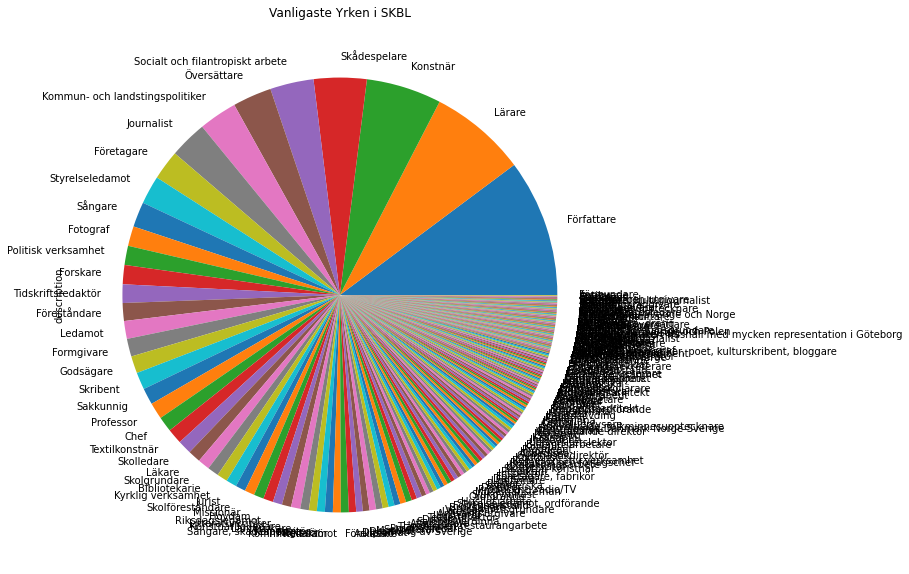

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
ax = Yrkendf.plot(kind='pie')

ax.set_title("Vanligaste Yrken i SKBL")

In [11]:
fig = ax.get_figure()
plt.rcParams['savefig.facecolor']='white'
fig.savefig('../img/SKBL_yrken_json.png')

In [12]:
newListdf.to_csv("SKBLyrken_newListdf.csv")
Yrkendf.to_csv("SKBLyrken_valuecount.csv")
